In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
tf.test.gpu_device_name()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/device:GPU:0'

**TASK 2**

In [0]:
class ModelCNN(object):
  def __init__(self):
    self.x_input = tf.placeholder(tf.float32, shape = [None, img_size_flat])
    self.x_image = tf.reshape(self.x_input, [-1, 28, 28, 1])

    # first convolutional layer
    W_conv1 = self._weight_variable([3,3,1,32])
    b_conv1 = self._bias_variable([32])

    h_conv1 = tf.nn.tanh(self._conv2d(self.x_image, W_conv1) + b_conv1)
    h_pool1 = self._max_pool_2x2(h_conv1)

    # second convolutional layer
    W_conv2 = self._weight_variable([3,3,32,64])
    b_conv2 = self._bias_variable([64])

    h_conv2 = tf.nn.tanh(self._conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = self._max_pool_2x2(h_conv2)

    # first fully connected layer
    W_fc1 = self._weight_variable([7 * 7 * 64, 128])
    b_fc1 = self._bias_variable([128])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])

    #embedding h
    self.h_fc1 = tf.nn.sigmoid(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # output layer
    W_fc2 = self._weight_variable([128,img_size_flat])
    b_fc2 = self._bias_variable([img_size_flat])

    output_fc2 = tf.matmul(self.h_fc1, W_fc2) + b_fc2

    self.x_reconst = tf.nn.sigmoid(output_fc2)

    self.loss = tf.reduce_mean(tf.squared_difference(self.x_reconst, self.x_input))

  @staticmethod
  def _weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

  @staticmethod
  def _bias_variable(shape):
      initial = tf.constant(0.1, shape = shape)
      return tf.Variable(initial)

  @staticmethod
  def _conv2d(x, W):
      return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

  @staticmethod
  def _max_pool_2x2(x):
      return tf.nn.max_pool(x, ksize = [1,2,2,1], strides=[1,2,2,1], padding='SAME')

Hyperparameters

In [0]:
# Hyperparameters
img_h = img_w = 28
img_size_flat = img_h * img_w

# Epoch is related with the optimization. I remember talking about epoch before. 
# Refer to your notes on stochastic gradient descent. 
epochs = 30

# I also mentioned minibatch stochastic gradient descent before. Batch size tells you the size of the 
# subsample you 
batch_size = 100
num_output_steps = 100

# Learning rate is related with gradient descent. 
learning_rate = 1e-3

Data Preparation and Setting Up Optimizer

In [0]:
# Setting up the data and the model
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
x_train = mnist.train.images
x_valid = mnist.validation.images
x_test  = mnist.test.images

global_step = tf.contrib.framework.get_or_create_global_step()
model = ModelCNN()

# Setting up the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(model.loss, global_step=global_step)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Training and Testing

Training epoch: 1
iter   0:	 Loss=0.244025
iter 100:	 Loss=0.063090
iter 200:	 Loss=0.055729
iter 300:	 Loss=0.045623
iter 400:	 Loss=0.036434
iter 500:	 Loss=0.032040
---------------------------------------------------------
Epoch: 1, validation loss: 0.029189
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.028485
iter 100:	 Loss=0.024870
iter 200:	 Loss=0.022708
iter 300:	 Loss=0.021019
iter 400:	 Loss=0.018829
iter 500:	 Loss=0.018594
---------------------------------------------------------
Epoch: 2, validation loss: 0.017575
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.016753
iter 100:	 Loss=0.015925
iter 200:	 Loss=0.015202
iter 300:	 Loss=0.014450
iter 400:	 Loss=0.013263
iter 500:	 Loss=0.013575
---------------------------------------------------------
Epoch: 3, validation loss: 0.013054
---------------------------------------------------------
Training epoch: 4
iter   0:	 Loss=0.0122

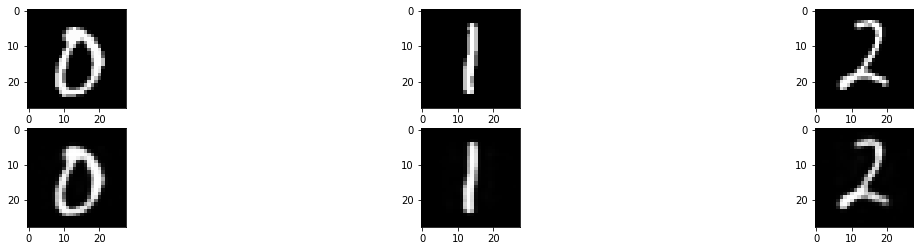

In [0]:
# Training
# Number of iterations represents the number of minibatches in the training set. 
# In each epoch, we go through every minibatch.
num_iter = int(len(x_train) / batch_size)
sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())
for epoch in range(epochs):
  print('Training epoch: {}'.format(epoch + 1))
  for iteration in range(num_iter):
    start = iteration * batch_size
    end = (iteration + 1) * batch_size
    x_batch = x_train[start:end]
    # When you run the optimizer, you take the gradients of the loss function with respect 
    # to model parameters and you updated them using the gradient update. This means when you
    # run the optimizer one forward pass (to compute loss) and one backward pass (to compute gradients) 
    # is executed.
    sess.run(optimizer, feed_dict={model.x_input: x_batch})
    # Here, the purpose is printing the accuracy after every 100 iterations. Lines 19-27 are to 
    # monitor how the training is doing. They are not really a part of the training, but it's a 
    # good practice to check how the training and validation accuracies doing during training to 
    # monitor underfitting and overfitting cases.
    if iteration % num_output_steps == 0:
      loss_batch = sess.run(model.loss, feed_dict={model.x_input: x_batch})
      print("iter {0:3d}:\t Loss={1:.6f}".format(iteration, loss_batch))
  loss_valid = sess.run(model.loss, feed_dict={model.x_input: x_valid})
  print('---------------------------------------------------------')
  print("Epoch: {0}, validation loss: {1:.6f}".format(epoch + 1, loss_valid))
  print('---------------------------------------------------------')

# Testing
# After all the epochs are done, you are done with learning the model parameters. If you run loss,
# you will only need a forward propagation. Realize that the data is changed. Now, we feed
# test data to the forward propagation (check feed_dict part).
loss_test = sess.run(model.loss, feed_dict={model.x_input: x_test})
print("Test loss: {0:.6f}".format(loss_test))

print('---------------------------------------------------------')
print('Task 4: Comparing 3 different images with reconstructed ones')


# comparing 3 original images with reconstructed ones
np.random.seed(1250)
random_n = np.random.randint(0, high=10000)

# beginning of reference: https://github.com/Tathagatd96/Deep-Autoencoder-using-Tensorflow/blob/master/Stacked_AutoEncoder.py
num_test_images = 3
results=model.x_reconst.eval(feed_dict={model.x_input:x_test[random_n:random_n+num_test_images]})
    
#Comparing original images with reconstructions
f,a=plt.subplots(2,3,figsize=(20,4))
for i in range(num_test_images):     
  a[0][i].imshow(np.reshape(x_test[random_n + i],(28,28)),cmap='gray')  
  a[1][i].imshow(np.reshape(results[i],(28,28)),cmap='gray')
# ending of reference



Task3: 
Test Flatten Images Visualisation


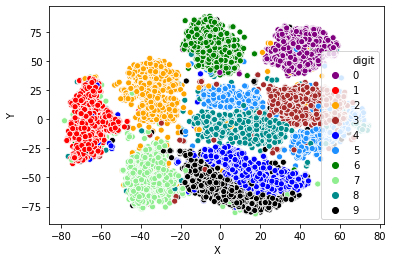

In [0]:
# scatterplot test images
# reference: https://cmdlinetips.com/2019/07/dimensionality-reduction-with-tsne/
print("Task3: \nTest Flatten Images Visualisation")

data_X = model.x_input.eval(feed_dict={model.x_input:x_test})
y = mnist.test.labels
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                      'Y':tsne_obj[:,1],
                      'digit':y})
sns.scatterplot(x="X", y="Y",
            hue="digit",
            palette=['purple','red','orange','brown','blue',
                      'dodgerblue','green','lightgreen','darkcyan', 'black'],
            legend='full',
            data=tsne_df)

Task3: 
Test Embeddings Visualisation


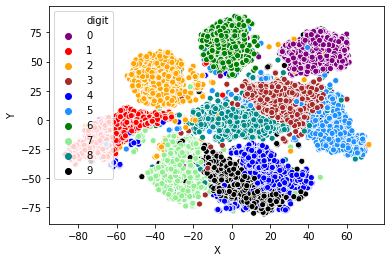

In [0]:
# scatter plot embeddings
# reference: https://cmdlinetips.com/2019/07/dimensionality-reduction-with-tsne/
print("Task3: \nTest Embeddings Visualisation")

data_X2 = model.h_fc1.eval(feed_dict={model.x_input:x_test})
y2 = mnist.test.labels
tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(data_X2)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                      'Y':tsne_obj[:,1],
                      'digit':y2})
sns.scatterplot(x="X", y="Y",
            hue="digit",
            palette=['purple','red','orange','brown','blue',
                      'dodgerblue','green','lightgreen','darkcyan', 'black'],
            legend='full',
            data=tsne_df)

sess.close()